*Proyecto* Programación II
#                    ¿Qué hace cara una vivienda? Análisis de Datos Inmobiliarios                            


# Introducción

El mercado inmobiliario es uno de los sectores económicos más dinámicos y estratégicos para la inversión. Comprender qué factores influyen en el precio de una vivienda permite tomar decisiones más informadas, optimizar presupuestos y detectar oportunidades rentables. En este proyecto se analiza un conjunto de datos de propiedades residenciales, con el objetivo de identificar patrones, relaciones y características que determinan el valor de una vivienda.

Utilizando herramientas de análisis de datos en Python, especialmente pandas, se realiza un proceso completo que incluye exploración, limpieza, tratamiento de valores atípicos, análisis estadístico y visualización. El propósito es transformar una base de datos cruda en información útil para responder preguntas clave como:

¿Qué características incrementan más el precio de una vivienda?

¿El área o el número de habitaciones influyen más en el valor?

¿Existen patrones que puedan orientar decisiones de inversión?

¿Es más rentable adquirir varias viviendas pequeñas o unas pocas propiedades grandes?

A través de este análisis se busca comprender las dinámicas del mercado representado en el dataset, identificar tendencias y generar conclusiones que puedan servir como guía para posibles inversores o investigadores interesados en el comportamiento del sector inmobiliario.

In [34]:
# Montamos drive:
from google.colab import drive
drive.mount('/content/drive')

# Cargamos el archivo desde la ruta:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Dataset_proyecto/Housing.csv')
df.head() #Visualizamos.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


**Exploración inicial del dataset**

Antes de realizar cualquier proceso de limpieza o transformación, es fundamental llevar a cabo una exploración inicial del dataset. Esta etapa permite comprender la estructura de los datos, identificar posibles problemas y establecer las bases para las decisiones posteriores del análisis.

**La exploración inicial se centra en responder preguntas como:**

¿Cuántas filas y columnas tiene la base de datos?

¿Qué tipos de variables contiene (numéricas, categóricas, fechas)?

¿Existen valores nulos o inconsistentes?

¿Hay columnas irrelevantes o redundantes?

¿Cómo se distribuyen las variables más importantes?

**Pasos típicos de la exploración inicial **

Dimensiones del dataset
Se verifica el número de registros y variables para comprender la escala del análisis.

Revisión de los nombres de las columnas
Es común detectar columnas mal nombradas, duplicadas o con espacios innecesarios.

Identificación de los tipos de datos
Permite diferenciar entre variables categóricas, numéricas, booleanas, etc., lo cual es clave para elegir las técnicas de limpieza y análisis.

Detección de valores nulos
Una vista general de los valores faltantes ayuda a definir estrategias como imputación, eliminación o transformación.

Estadísticas descriptivas iniciales
Muestran rangos, promedios y distribuciones básicas de las variables numéricas; permiten identificar posibles outliers o errores de digitación.

Exploración preliminar de distribuciones
Se examinan variables clave como precio, área, número de habitaciones, entre otras, para observar comportamientos generales.

In [35]:
# Exploración inicial del dataset

# 1. Dimensiones del dataset
print(df.shape)  # (filas, columnas)

# 2. Revisar nombres de las columnas
print(df.columns)

# 3. Tipos de datos de cada variable
df.dtypes

# 4. Revisión de valores nulos
df.isnull().sum()

# 5. Estadísticas descriptivas generales
df.describe()

# 6. Exploración básica de distribución de una columna clave (ej: precio)
df['price'].describe()


(545, 13)
Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


,price
count,5.450000e+02
mean,4.766729e+06
std,1.870440e+06
min,1.750000e+06
25%,3.430000e+06
50%,4.340000e+06
75%,5.740000e+06
max,1.330000e+07


Limpieza del dataset:


In [36]:
#Vista general del dataset:

#Con esto identificamosa; tipo de datos, colunmams numéricas y caregóricas,
#valores faltantes y rango de valores.
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


<Axes: ylabel='price'>

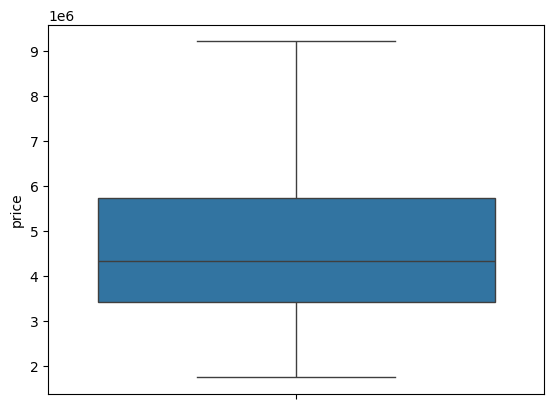

In [45]:
#Identificación de valores faltantes (Missing Values).

df.isnull().sum() #---> No hay valores faltantes.


#Verificamos valores duplicados:
df.duplicated().sum() #---> No hay valores duplicados.

#Verificamos Outliers:

#Primeramente por precio (Por ejemplo una casa de 1M o de 100m²).
df["price"].describe()
import seaborn as sns
sns.boxplot(df['price'])



# **Tratamiento de Outliers mediante Winsorizing**

Durante el análisis exploratorio se identificó que algunas variables del dataset, especialmente price y area, contenían valores atípicos significativamente superiores al rango esperado. Estos outliers correspondían en su mayoría a propiedades de lujo que, si bien son reales, afectan negativamente la estabilidad estadística de los análisis descriptivos.

En lugar de eliminar estas observaciones, lo cual implicaría perder información valiosa sobre el mercado inmobiliario de alto nivel, se aplicó la técnica de winsorizing utilizando el rango intercuartílico (IQR). Esta técnica recorta los valores que exceden los límites superiores e inferiores permitidos, reemplazándolos por el valor límite más cercano.

✔ **¿Por qué se usó esta técnica?**

Evita eliminar datos reales, especialmente propiedades de lujo relevantes para el mercado.

Reduce el impacto que los valores extremos tienen sobre medidas como la media y la desviación estándar.

Permite trabajar con mediana/moda sin distorsiones, y realizar análisis más estables.

Mantiene la estructura del dataset, conservando la misma cantidad de filas.

✔ **Beneficio final**

Este método permite realizar análisis más confiables, sin sacrificar información importante del conjunto de datos. Es la técnica ideal cuando los outliers representan casos reales y no errores de digitación.

Boxplot con datos atipicos:
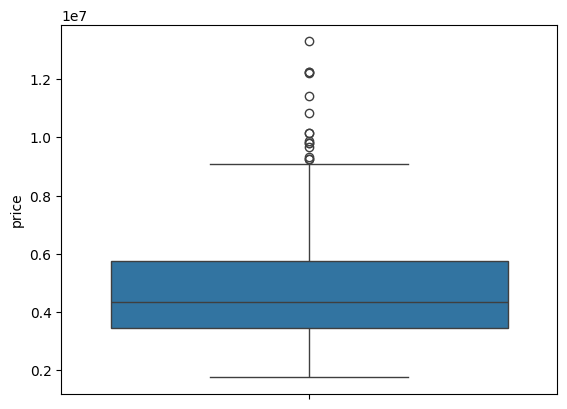

In [38]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# Interpretación del describe() — Variable por variable
 price

Media: 4.76M

Mediana: 4.34M

Máximo: 13.3M → muy por encima del Q3 (5.74M)
✔ Tiene outliers fuertes.
✔ Distorsionan la media.
 Para análisis serio → usar mediana.

 area

Media: 5,150

Mediana: 4,600

Máximo: 16,200
Esto también es sospechoso: 16.200 ft² es una mansión enorme.

✔ También tiene outliers.
 Igual: usar mediana o winsorizing.

 bedrooms

Media ≈ 3

Mediana = 3

Rango: 1–6
✔ Bastante limpio. No hay anomalías.

 bathrooms

Media ≈ 1.28

Mediana = 1

Máx = 4
✔ También normal. Puedes dejarlo así.

 stories (pisos)

Media ≈ 1.8

Mediana = 2

Rango: 1–4
✔ Sin problemas.

 parking

Media ≈ 0.69

Mediana = 1

Máx = 3
 Aquí hay que ver si hay muchas casas con 0 parqueaderos, pero no parece ser error.

<Axes: ylabel='price'>

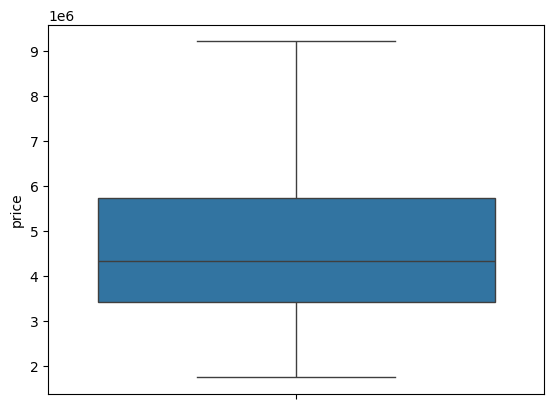

In [39]:
#Metodo de limpieza de datos:

import numpy as np

# Función para aplicar Winsorizing usando el método del rango intercuartílico (IQR)
def cap_outliers(df, col):
    """
    Reemplaza los valores atípicos (outliers) de una columna utilizando el método Winsorizing.

    Explicación:
    - Calcula el rango intercuartílico (IQR).
    - Define límites inferior y superior usando la regla de 1.5 * IQR.
    - Todo valor que esté fuera de estos límites se reemplaza por el valor límite más cercano.

    ¿Por qué se usa?
    - Mantiene la cantidad de datos.
    - Reduce el efecto de valores extremos sin eliminarlos.
    - Es útil cuando los outliers representan casos reales (ej. casas premium).
    """

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Límites que definen qué es un outlier
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR

    # Reemplazo de valores extremos por los límites (Winsorizing)
    df[col] = np.where(df[col] < lim_inf, lim_inf,
                np.where(df[col] > lim_sup, lim_sup, df[col]))

# Aplicamos la técnica a price y area (las más afectadas)
cap_outliers(df, 'price')
cap_outliers(df, 'area')

sns.boxplot(df['price']) #Boxplot con la limpieza de datos aplicada:


# Análisis Estadísco y Correlaciones.
*Objetivo de esta sección*

El propósito de este punto es extraer información estadística relevante del dataset y entender cómo se relacionan las variables entre sí, especialmente respecto al precio, que suele ser la variable objetivo más importante en estudios inmobiliarios.

**¿Qué incluye el análisis?**
1. **Estadísticas descriptivas**

— Media
— Mediana
— Moda
— Rango
— Desviación estándar
— IQR (para identificar qué tan dispersos están los precios o áreas)

2. **Distribuciones**

— Cómo se comporta el precio (sesgo a la derecha típico del mercado)
— Cómo se distribuye el tamaño, terreno, habitaciones, etc.

3. **Correlaciones**

— Matriz numérica de correlación
— Interpretación: qué variables influyen más en el precio
— Detección de relaciones fuertes y débiles

In [40]:
# ============================================
# 4. ANÁLISIS ESTADÍSTICO Y CORRELACIONES
# ============================================

# 1. ESTADÍSTICAS DESCRIPTIVAS GENERALES
df.describe().T   # .T para verlas en forma vertical más legible

# 2. ESTADÍSTICAS ESPECÍFICAS DE COLUMNAS CLAVE
print("Estadísticas del precio:")
print(df['price'].describe())
print("\nMediana:", df['price'].median())
print("Moda:", df['price'].mode()[0])

print("\nEstadísticas del área construida:")
print(df['area'].describe())

# 3. CÁLCULO DEL IQR PARA VARIABLES IMPORTANTES (Precio y Área)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
print("\nIQR (Precio):", IQR)

Q1_area = df['area'].quantile(0.25)
Q3_area = df['area'].quantile(0.75)
IQR_area = Q3_area - Q1_area
print("IQR (Área):", IQR_area)

# 4. MATRIZ DE CORRELACIÓN
corr_matrix = df.corr(numeric_only=True)
corr_matrix

# 5. Ordenar las correlaciones respecto al precio
print("\nCorrelación de cada variable con el precio:")
corr_matrix['price'].sort_values(ascending=False)


Estadísticas del precio:
count    5.450000e+02
mean     4.727388e+06
std      1.745227e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      9.205000e+06
Name: price, dtype: float64

Mediana: 4340000.0
Moda: 3500000.0

Estadísticas del área construida:
count      545.000000
mean      5102.249541
std       2005.804353
min       1650.000000
25%       3600.000000
50%       4600.000000
75%       6360.000000
max      10500.000000
Name: area, dtype: float64

IQR (Precio): 2310000.0
IQR (Área): 2760.0

Correlación de cada variable con el precio:


,price
price,1.000000
area,0.553876
bathrooms,0.508686
stories,0.431724
parking,0.373578
bedrooms,0.368216


***Interpretación del Análisis Estadístico***
**✔ Precio**

Las estadísticas del precio muestran:

Media: 4.727.388

Mediana: 4.340.000

Moda: 3.500.000

**Conclusión:**
La media es mayor que la mediana, lo cual indica que hay propiedades de precio alto que arrastran el promedio hacia arriba.
Esto es típico en los mercados inmobiliarios donde hay unas pocas viviendas muy costosas.

✔ *Área construida*

Media: 5.102

Mediana: 4.600

Máximo: 10.500

IQR: 2.760

*Conclusión:*
El área también presenta alta dispersión, lo cual indica variedad en los tamaños de las viviendas.
Sin embargo, es relativamente estable: la mayoría cae entre 3.600 y 6.360 m² (según cuartiles).

IQR (Precio: 2.310.000 y Área: 2.760)

Estos valores confirman un mercado con bastante variedad. Un IQR alto significa que el precio cambia bastante de vivienda a vivienda, por lo que las variables asociadas al tamaño sí importan.

# Interpretación de Correlaciones

| Variable      | Correlación con el precio |
| ------------- | ------------------------- |
| **area**      | **0.5538**                |
| **bathrooms** | **0.5086**                |
| **stories**   | 0.4317                    |
| **parking**   | 0.3735                    |
| **bedrooms**  | 0.3682                    |


✔ **1. El área es la variable más influyente (0.55)**

Esto significa que, en este dataset:

A mayor área construida, mayor precio.
Es la variable con más poder explicativo del valor de una vivienda.

Muy lógico y respalda conclusiones futuras.

✔ **2. Los baños afectan más el precio que los dormitorios**

— bathrooms → 0.50
— bedrooms → 0.36

 Eso es interesante:

El número de baños es un indicador más fuerte del nivel de comodidad y modernidad de la vivienda.

Los dormitorios aumentan el tamaño pero no necesariamente el nivel.

✔ **3. Más pisos (stories) también sube el precio**

0.43 sugiere que:

Edificaciones más grandes o con más niveles suelen ser más costosas.

✔ **4. El estacionamiento tiene moderada importancia (0.37)**

No determina el precio tanto como el tamaño, pero sí influye.

Tener parqueadero agrega valor, pero no define el precio.

### Resúmen:

Con base en la matriz de correlación se determinó que el área construida es la variable con mayor relación con el precio (0.55), seguida por el número de baños (0.50) y el número de pisos (0.43). Esto indica que el tamaño del inmueble y su nivel de comodidad (medido por la cantidad de baños) son los principales factores de valorización en este mercado. Variables como el número de dormitorios (0.36) y los espacios de estacionamiento (0.37) presentan correlaciones moderadas, lo cual sugiere que aportan valor, pero en menor medida que el área total. En conjunto, estas correlaciones permiten comprender qué características inciden más en la formación del precio y sirven como base para las visualizaciones y análisis posteriores.

### Análisis Estadístico y Correlaciones:



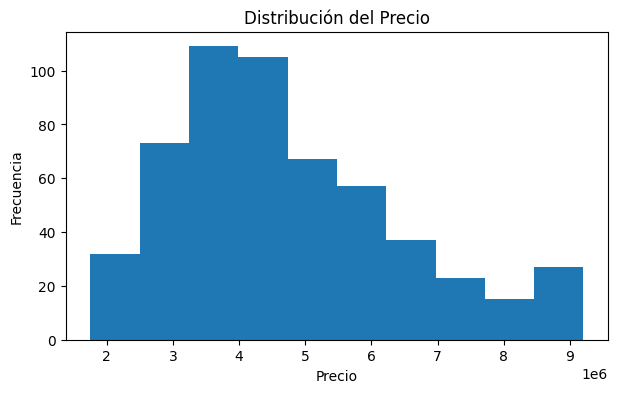

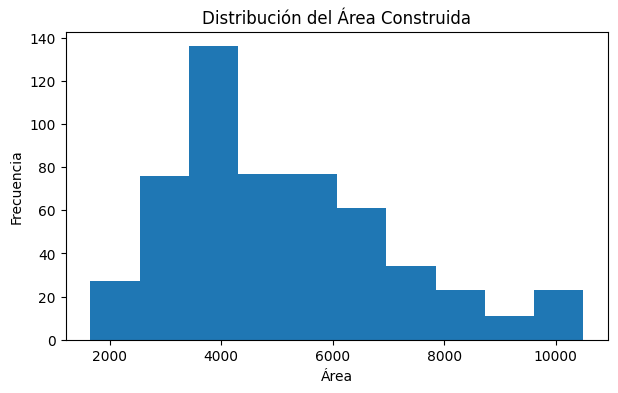

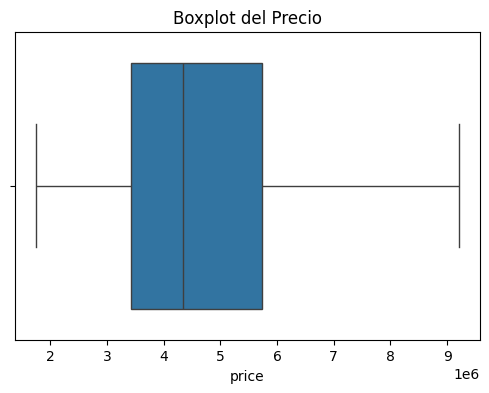

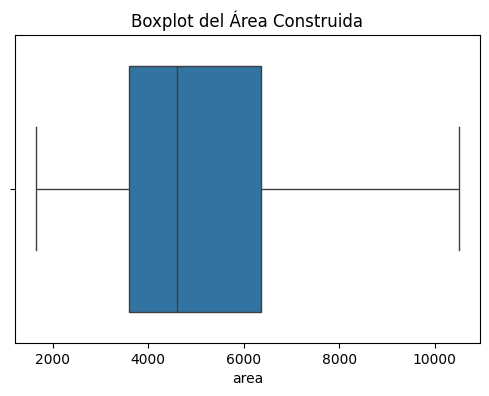

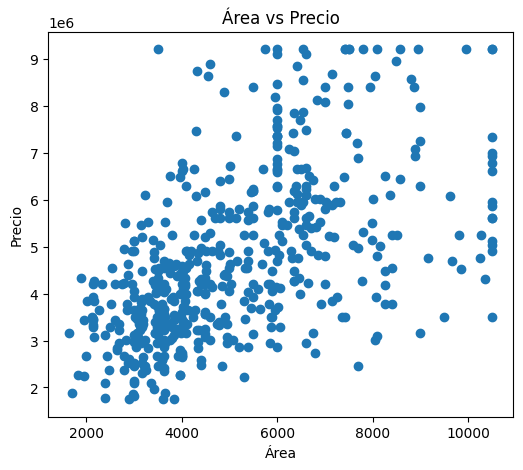

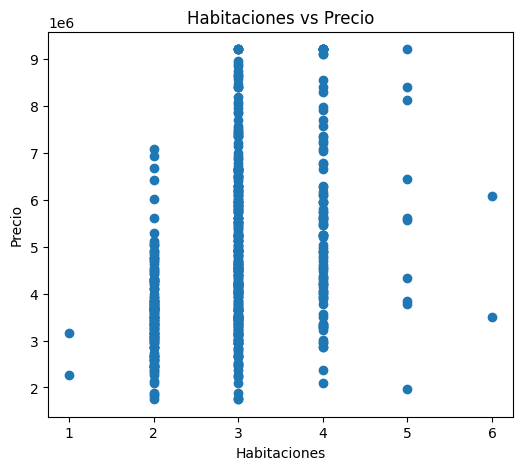

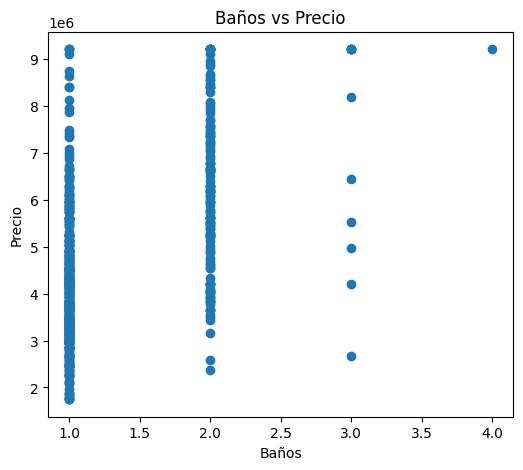

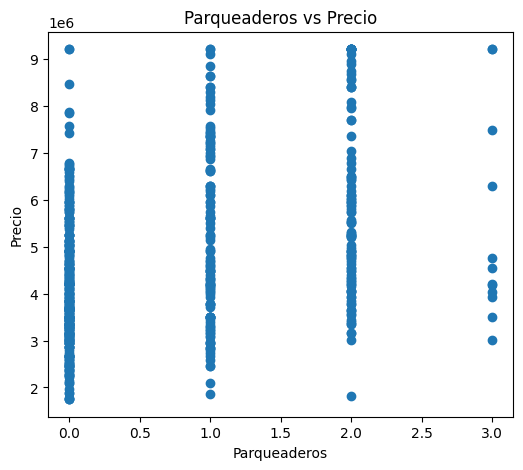

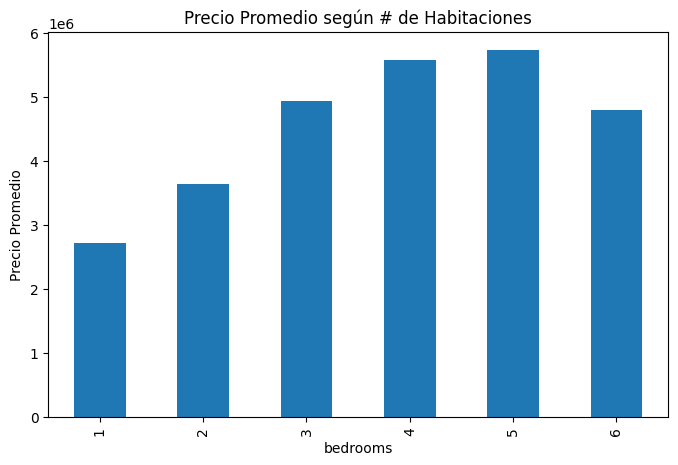

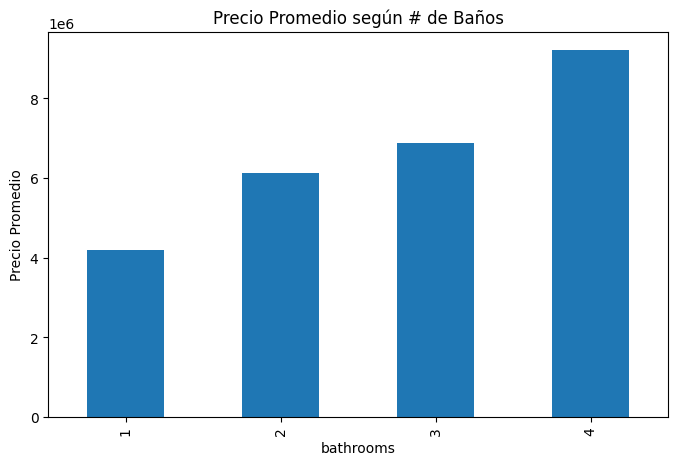

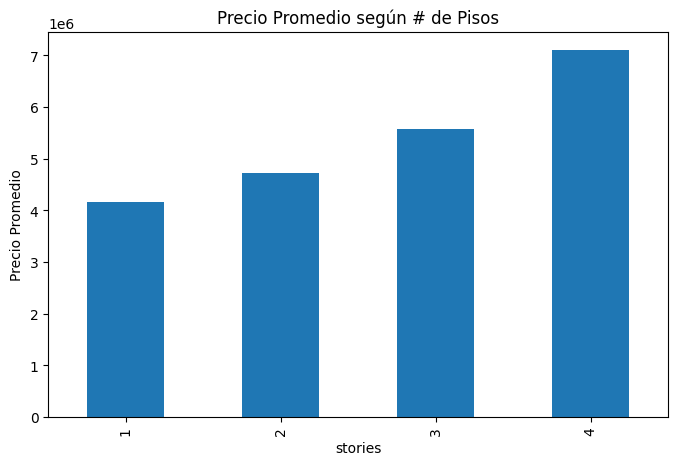

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# ================================
# 1. HISTOGRAMAS
# ================================
plt.figure(figsize=(7,4))
plt.hist(df['price'])
plt.title("Distribución del Precio")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(df['area'])
plt.title("Distribución del Área Construida")
plt.xlabel("Área")
plt.ylabel("Frecuencia")
plt.show()

# ================================
# 2. BOXPLOTS
# ================================
plt.figure(figsize=(6,4))
sns.boxplot(x=df['price'])
plt.title("Boxplot del Precio")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df['area'])
plt.title("Boxplot del Área Construida")
plt.show()

# ================================
# 3. SCATTER PLOTS
# ================================
plt.figure(figsize=(6,5))
plt.scatter(df['area'], df['price'])
plt.title("Área vs Precio")
plt.xlabel("Área")
plt.ylabel("Precio")
plt.show()

plt.figure(figsize=(6,5))
plt.scatter(df['bedrooms'], df['price'])
plt.title("Habitaciones vs Precio")
plt.xlabel("Habitaciones")
plt.ylabel("Precio")
plt.show()

plt.figure(figsize=(6,5))
plt.scatter(df['bathrooms'], df['price'])
plt.title("Baños vs Precio")
plt.xlabel("Baños")
plt.ylabel("Precio")
plt.show()

plt.figure(figsize=(6,5))
plt.scatter(df['parking'], df['price'])
plt.title("Parqueaderos vs Precio")
plt.xlabel("Parqueaderos")
plt.ylabel("Precio")
plt.show()

# ================================
# 4. GRÁFICOS DE BARRAS
# ================================
plt.figure(figsize=(8,5))
df.groupby("bedrooms")["price"].mean().plot(kind="bar")
plt.title("Precio Promedio según # de Habitaciones")
plt.ylabel("Precio Promedio")
plt.show()

plt.figure(figsize=(8,5))
df.groupby("bathrooms")["price"].mean().plot(kind="bar")
plt.title("Precio Promedio según # de Baños")
plt.ylabel("Precio Promedio")
plt.show()

plt.figure(figsize=(8,5))
df.groupby("stories")["price"].mean().plot(kind="bar")
plt.title("Precio Promedio según # de Pisos")
plt.ylabel("Precio Promedio")
plt.show()



### Interpretación de las Visualizaciones
**Distribución del Precio**

El histograma del precio revela una distribución asimétrica hacia la derecha, donde la mayor concentración de viviendas se encuentra entre los 2.5 y 6 millones. Este rango corresponde al segmento medio del mercado, el cual domina claramente el dataset. A medida que el precio aumenta, la frecuencia disminuye, pero se identifican propiedades de hasta 9 millones, lo que indica la presencia de un segmento premium reducido.

El boxplot confirma esta variabilidad: la mediana se sitúa alrededor de 4.5 millones, con un rango intercuartílico amplio que muestra un mercado heterogéneo. La amplitud del rango, incluso después del winsorizing, evidencia diferencias marcadas entre viviendas económicas, medias y de lujo.

Desde una perspectiva de inversión, el segmento medio representa la zona de mayor liquidez y rotación. Las propiedades de mayor valor existen, pero tienden a tener una demanda más especializada y tiempos de venta más largos.

*Distribución del Área Construida*

El área construida presenta una distribución similar en forma: también es asimétrica positiva, con mayor frecuencia en el intervalo entre 3 000 y 6 000 unidades. Este rango define el tamaño típico de las viviendas del dataset. Las propiedades de gran tamaño, superiores a 10 000 unidades, existen en menor proporción, lo que indica la presencia de un inventario más exclusivo.

El boxplot refuerza esta interpretación: la mediana se ubica alrededor de 4 500, y el rango intercuartílico muestra una diversidad considerable en tamaños de vivienda.

Para los inversionistas, las viviendas medianas representan la opción más equilibrada entre costo, tamaño y demanda. Las viviendas de gran área tienen un valor alto, pero su mercado es más limitado.

**Relación entre Área y Precio**

El gráfico de dispersión entre área y precio muestra una relación positiva clara: conforme el área aumenta, el precio también lo hace. Aunque existe variabilidad, se evidencia un patrón consistente:

Áreas pequeñas tienden a concentrarse en precios bajos y medios.

Áreas medianas aparecen en un rango amplio que va desde los 3 hasta los 6 millones.

Áreas grandes se asocian a precios altos, generalmente por encima de los 7 millones.

Este comportamiento confirma que el área es el factor más determinante del precio dentro del dataset.

**Preguntas Finales del Proyecto**
**¿Qué hace más valiosa una vivienda según los datos?**

Los resultados indican que el área construida es el principal determinante del valor. A esto se suman otras características con relevancia significativa:

Área construida

Número de baños

Número de pisos

Parqueadero

Número de habitaciones (influyente, pero menos que las anteriores)

Las viviendas se valoran más por el espacio real y las comodidades, más que por la cantidad de cuartos únicamente.

**¿Qué influye más entre área, cuartos, baños, pisos y parqueadero?**

El orden de influencia observada es:

Área (fuerte correlación con el precio)

Baños

Pisos (stories)

Parqueadero

Habitaciones

**¿Es mejor invertir en varias viviendas pequeñas o en pocas grandes?**

**Con base en las distribuciones y la concentración del mercado en el rango medio:**

Las viviendas pequeñas y medianas ofrecen mayor liquidez, menor riesgo y mejor capacidad de rotación.

Las viviendas grandes suelen tener compradores más específicos y tiempos de venta prolongados.

**Conclusión:** Para un inversionista es más beneficioso adquirir varias viviendas medianas que una sola vivienda muy grande.

**Conclusiones Inmobiliarias**

El mercado está dominado por viviendas de rango medio tanto en precio como en área.

El área es la variable que más determina el valor de una propiedad.

Las características funcionales (baños, pisos, parqueadero) influyen más que el número de habitaciones.

Existe un segmento premium reducido, pero claramente diferenciado.

La alta dispersión en precios muestra un mercado diverso con oportunidades en distintos niveles de inversión.

# Conclusiones Finales del Proyecto
## Conclusiones Generales

El análisis del dataset Housing permitió comprender la estructura y el comportamiento del mercado inmobiliario representado. Las distribuciones evidencian un mercado concentrado en viviendas de tamaño y precio medios, mientras que los boxplots muestran una alta variabilidad que refleja la heterogeneidad del inventario. La relación entre área y precio es directa y consistente, consolidando al área como el factor más relevante en la valoración de una vivienda.

**Recomendaciones para Compradores**

Priorizar viviendas dentro del rango medio, donde los precios son más razonables y existe mayor oferta.

Valorar más el área y el número de baños que solamente la cantidad de habitaciones.

Considerar el equilibrio entre tamaño, comodidad y precio para obtener la mejor relación costo–beneficio.

**Recomendaciones para Vendedores**

Destacar el área construida y los baños en la presentación de la vivienda.

En propiedades grandes, orientar la estrategia de venta hacia compradores de nicho.

Competir dentro del rango medio puede generar ventas más rápidas debido a la mayor demanda.

**Recomendaciones para Inversionistas**

Favorecer la adquisición de viviendas medianas por su alta liquidez y menor riesgo.

Considerar comprar varias propiedades medianas en lugar de una sola muy grande, diversificando la inversión.

Evaluar siempre la relación entre área, baños y parqueadero como indicadores clave del valor de una vivienda.

In [47]:
!pip freeze > requirements.txt
